# Call Center Cleanup

For this assignment, we will be working with call center data. You can start working on the assignment after the first lesson on Exploratory Data Analysis. Make sure to read the whole assignment before starting anything! As you code along in the Jupyter notebook, you are asked to make note of the results of your analysis. Do so by clicking on the results box and adding your notes beside each question.

## Business Issue and Understanding

You are working for a company that has two call centers: the North Call Center and the South Call Center. The company is looking to possibly hire five additional reps to enhance customer experience. Your task is to explore how efficient the current reps are in each branch to determine which branch would benefit from additional assistance.

### How the Call Center Works

Call center representatives are assigned queues. When calls are assigned to a queue, the call is assigned to the next person in line in the queue. After a call is assigned to a representative, the amount of time between assignment and the call starting is divided into busy minutes and not ready minutes. If the call is incoming and a customer is waiting on the phone for a rep, the time is split into three categories: busy minutes, not ready minutes, and incoming call wait time. Once the rep has the customer on the phone, there might be during call wait time, where the call is put on hold while the rep gets an answer for the customer.

### Notes about the Dataset

If you haven't worked in a call center before, these notes might help you throughout your analysis.

* The call purpose is tagged for each call.
* The time of the call is tagged in 1 hour blocks starting at 9:00 AM and ending at 5:00 PM.
* Calls are tagged as incoming or outgoing.
* Reps are assigned to queues. When the reps are working, they take calls in the order of their queue.
* A call that is dropped due to technical error or missed by the center because they have reached maximum capacity is a lost call.
* An abandoned call is when the customer hangs up because they have been waiting for too long.
* Busy Minutes: the amount of time after a call comes in or needs to go out where the assigned rep is not available because they are busy with other customers.
* Not Ready Minutes: the amount of time after a call comes in or needs to go out where the assigned rep is not available because they are not ready (for example, getting water).
* Incoming Wait Time - amount of time after assigned rep is available to take the call customer waits for representative to pick up a call. This is tracked in seconds.
* During Call Wait Time - amount of time during call that customer has to wait for representative

## Getting Started

You have two CSVs at your disposal, `NorthCallCenter.csv` and `SouthCallCenter.csv`. Import the appropriate libraries and create two dataframes, one called `north_df` and one called `south_df`.

In [2]:
# Import the appropriate libraries with aliases
import pandas as pd
import numpy as np

# Create two new dataframes
northDF = pd.read_csv("C:\\Users\\Khazbin\\Desktop\\Data Analysis\\call-center-cleanup-assignment-main\\NorthCallCenter.csv")
southDF = pd.read_csv("C:\\Users\\Khazbin\\Desktop\\Data Analysis\\call-center-cleanup-assignment-main\\SouthCallCenter.csv")

<span style="background-color:orangered; color:orangered;">- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -</span>

## Exploratory Data Analysis

Time to do some EDA! In the process of learning more about the two datasets, answer the following questions. In the code blocks below enter the code used to solve the question.  At the end of the section record your answers by double clicking where asked.

#### EDA Question 1A:  How many reps are in the North branch?  

In [3]:
#Code Used:
northDF["Rep ID"].nunique()

9

#### EDA Question 1B:  How many reps are in the South branch?  

In [4]:
#Code Used:
southDF["Rep ID"].nunique()

11

#### EDA Question 2A:  What is the average busy minutes, not ready minutes, incoming wait time, and during call wait time for the North branch? 

In [5]:
#Code Used:
nBusy = northDF["Busy Minutes"].mean().round(decimals=2)
nNotReady = northDF["Not Ready Minutes"].mean().round(decimals=2)
nIncomingWait = northDF["Incoming Wait Time"].mean().round(decimals=2)
nDuringCallWait = northDF["During Call Wait Time"].mean().round(decimals=2)

print(f"The average busy minutes is {nBusy}.\nThe average not ready minutes is {nNotReady}.\nThe average incoming wait time is {nIncomingWait}.\nThe average during call wait time is {nDuringCallWait}.")

The average busy minutes is 9.99.
The average not ready minutes is 1.91.
The average incoming wait time is 3.05.
The average during call wait time is 2.97.


#### EDA Question 2B:  What is the average busy minutes, not ready minutes, incoming wait time, and during call wait time for the South branch? 

In [6]:
#Code Used:
sBusy = southDF["Busy Minutes"].mean().round(decimals=2)
sNotReady = southDF["Not Ready Minutes"].mean().round(decimals=2)
sIncomingWait = southDF["Incoming Wait Time"].mean().round(decimals=2)
sDuringCallWait = southDF["During Call Wait Time"].mean().round(decimals=2)

print(f"The average busy minutes is {sBusy}.\nThe average not ready minutes is {sNotReady}.\nThe average incoming wait time is {sIncomingWait}.\nThe average during call wait time is {sDuringCallWait}.")

The average busy minutes is 10.05.
The average not ready minutes is 1.91.
The average incoming wait time is 3.0.
The average during call wait time is 3.08.


#### EDA Question 3:  What is the number of calls taken for each time block(Both North and South combined)?

In [7]:
# Code Used:
nCallsSum = northDF.groupby(["Time Block"])["Calls"].count()
sCallsSum = southDF.groupby(["Time Block"])["Calls"].count()
totalCalls = nCallsSum+sCallsSum

print(f"The total calls for each time block of the North Call Center is:\n{nCallsSum}.\n\nThe total calls for each time block of the South Call Center is\n{sCallsSum}.\n\nThe total for both is:\n{totalCalls}")
northDF.head()

The total calls for each time block of the North Call Center is:
Time Block
10:00 AM    43
11:00 AM    25
12:00 PM    45
1:00 PM     17
2:00 PM     35
3:00 PM     30
4:00 PM     28
5:00 PM     17
9:00 AM      5
Name: Calls, dtype: int64.

The total calls for each time block of the South Call Center is
Time Block
10:00 AM    56
11:00 AM    31
12:00 PM    75
1:00 PM     23
2:00 PM     30
3:00 PM     43
4:00 PM     25
5:00 PM     26
9:00 AM      5
Name: Calls, dtype: int64.

The total for both is:
Time Block
10:00 AM     99
11:00 AM     56
12:00 PM    120
1:00 PM      40
2:00 PM      65
3:00 PM      73
4:00 PM      53
5:00 PM      43
9:00 AM      10
Name: Calls, dtype: int64


,Unnamed: 0,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
0,0,North,Complaint,9:00 AM,Incoming,B,Brent,NO,0,1,9,2,1.0,4,1
1,1,North,Sales Support,11:00 AM,Incoming,A,Cam,NO,0,0,11,1,1.0,3,1
2,2,North,Sales Support,11:00 AM,Incoming,B,Todd,NO,0,0,9,3,1.0,3,1
3,3,North,Sales Support,4:00 PM,Incoming,B,Brent,NO,0,0,11,2,1.0,4,1
4,4,North,Product Support,12:00 PM,Incoming,B,Brent,NO,0,0,8,2,1.0,4,1


##### Record your answers for the EDA section by double clicking here:
- 1a) Reps in the North Branch = 9
- 1b) Reps in the South Branch = 11


- 2a) North Branch, (round to the nearest hundredth):
> - Busy Minutes = 9.99
> - Not Ready Minutes = 1.91
> - Incoming Wait Time = 3.05
> - During Call Wait Time = 2.97
- 2b) South Branch, (round to the nearest hundredth):
> - Busy Minutes = 10.05
> - Not Ready Minutes = 1.91
> - Incoming Wait Time = 3.0
> - During Call Wait Time = 3.08
- 3) Total Calls taken for all branches per time block:
> - 9:00AM   = 10
> - 10:00AM  = 99
> - 11:00AM  = 56
> - 12:00PM  = 120
> - 1:00PM   = 40
> - 2:00PM   = 65
> - 3:00PM   = 73
> - 4:00PM   = 53
> - 5:00PM   = 43



<span style="background-color:orangered; color:orangered;">- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -</span>

## Cleaning Your Data 
Now you need to clean up the datasets. When cleaning the datasets, you may find that there isn't dirty data to clean. That is okay! Some questions you need to answer about the data sets.
* Add additional code blocks as needed to show how you came to your conclusions. Add comments in your code blocks to help others understand your thinking. 

#### Cleaning Question 1:  Is there any missing data and if yes explain what you would do with the missing data and why?
##### Record your answer by double clicking here:
> Your Answer: There is missing data in both dataframes for the "Incoming Wait Time" columns. This is due to the outgoing calls having no wait time, and thus no data entered. In this case, I would leave the data as is.

In [8]:
# Code Used for North Call Center

# Finding the percentage of missing data for each column.
for col in northDF.columns:
    pctMissing = np.mean(northDF[col].isnull())
    print('{} - {}%'.format(col, round(pctMissing*100)))
    
# Determining if wait time from incoming calls is actually missing.
pd.set_option('display.max_rows', None)
northMissingTime = northDF["Incoming or Outgoing"].isnull() | northDF["Incoming Wait Time"].isnull()
print(northDF[northMissingTime][["Incoming or Outgoing","Incoming Wait Time"]])

Unnamed: 0 - 0%
Branch - 0%
Call Purpose - 0%
Time Block - 0%
Incoming or Outgoing - 0%
Queue - 0%
Rep ID - 0%
Sale - 0%
Lost Call - 0%
Abandoned - 0%
Busy Minutes - 0%
Not Ready Minutes - 0%
Incoming Wait Time - 67%
During Call Wait Time - 0%
Calls - 0%
    Incoming or Outgoing  Incoming Wait Time
82              Outgoing                 NaN
83              Outgoing                 NaN
84              Outgoing                 NaN
85              Outgoing                 NaN
86              Outgoing                 NaN
87              Outgoing                 NaN
88              Outgoing                 NaN
89              Outgoing                 NaN
90              Outgoing                 NaN
91              Outgoing                 NaN
92              Outgoing                 NaN
93              Outgoing                 NaN
94              Outgoing                 NaN
95              Outgoing                 NaN
96              Outgoing                 NaN
97              Outgoing 

In [9]:
# Code Used for South Call Center

for col in southDF.columns:
    pctMissing = np.mean(southDF[col].isnull())
    print('{} - {}%'.format(col, round(pctMissing*100)))

# Determining if wait time from incoming calls is actually missing.
pd.set_option('display.max_rows', None)
southMissingTime = southDF["Incoming or Outgoing"].isnull() | southDF["Incoming Wait Time"].isnull()
print(southDF[southMissingTime][["Incoming or Outgoing","Incoming Wait Time"]])

Unnamed: 0 - 0%
Branch - 0%
Call Purpose - 0%
Time Block - 0%
Incoming or Outgoing - 0%
Queue - 0%
Rep ID - 0%
Sale - 0%
Lost Call - 0%
Abandoned - 0%
Busy Minutes - 0%
Not Ready Minutes - 0%
Incoming Wait Time - 60%
During Call Wait Time - 0%
Calls - 0%
    Incoming or Outgoing  Incoming Wait Time
126             Outgoing                 NaN
127             Outgoing                 NaN
128             Outgoing                 NaN
129             Outgoing                 NaN
130             Outgoing                 NaN
131             Outgoing                 NaN
132             Outgoing                 NaN
133             Outgoing                 NaN
134             Outgoing                 NaN
135             Outgoing                 NaN
136             Outgoing                 NaN
137             Outgoing                 NaN
138             Outgoing                 NaN
139             Outgoing                 NaN
140             Outgoing                 NaN
141             Outgoing 

#### Cleaning Question 2:  In the North data set, there are two separate "YES" values for a sale. Why and how did you rectify the issue?
##### Record your answer by double clicking here:
> Your Answer: At least one "YES" value had a space after it, making it "YES " instead. To rectify this, I replaced all instances of "YES " in the Sale column with "YES", then checked that Sale now contains only "NO" or "YES".

In [10]:
#Code Used
# Determining why there are two YES values for sale.
northSales = northDF["Sale"].unique()
northSales

# Replacing "YES " with "YES".
northDF["Sale"] = northDF["Sale"].replace("YES ","YES")

# Ensuring the replacement was a success.

replacedNorthSales = northDF["Sale"].unique()
replacedNorthSales

array(['NO', 'YES'], dtype=object)

#### Cleaning Question 3:  Are there duplicates in the two data sets? If there are, how did you handle them?
##### Record your answer by double clicking here:
> Your Answer: No duplicate entries were found in the data set.

In [11]:
#Code Used
# Checking the north call center data for duplicate entries.
northDupes = northDF[northDF.duplicated()]
northDupes

,Unnamed: 0,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls


In [12]:
#Code Used
# Checking the south call center data for duplicate entries.
southDupes = southDF[southDF.duplicated()]
southDupes

,Unnamed: 0,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls


#### Cleaning Question 4:  Is any of the data in the two data sets unnecessary? If yes, how did you handle it?
##### Record your answer by double clicking here:
> Your Answer: I think the data captured is necessary, so there's no reason to drop any of it.

In [17]:
#Code Used
# Add Additional Cells as needed.

<span style="background-color:orangered; color:orangered;">- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -</span>

## Data Manipulation
Before you begin answering any questions, combine the two datasets together to create a third dataframe called df. You can use this third dataframe to compare the two call centers to company-wide trends.
* Add additional code blocks as needed to show how you came to your conclusions. Add comments in your code blocks to help others understand your thinking. Record your answer by double clicking the below cell.

In [13]:
# Create dataframe for the entire company named df
DF = pd.concat([northDF,southDF],axis=0)

#### Manipulation Question 1:  Group by Rep ID and sum the resulting structure. Sort by calls to determine which rep in each branch has the highest number of calls.

##### Record your answer by double clicking here:
Rep with the hightest number of calls and their total calls:
- North Branch = Brent, 37
- South Branch = Eric, 35


In [14]:
# Code Used
# Group by Rep ID and Branch, then sum numerical columns and sort by Calls, largest sum to smallest sum.
repIDSum = DF.groupby(["Rep ID","Branch"]).sum().sort_values(by=["Calls"],ascending=False)

# Display only Rep ID, Branch, and Calls
repIDBranchCalls = repIDSum[["Calls"]]
repIDBranchCalls

C:\Users\Khazbin\AppData\Local\Temp\ipykernel_11072\3820593062.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  repIDSum = DF.groupby(["Rep ID","Branch"]).sum().sort_values(by=["Calls"],ascending=False)


,,Calls
Rep ID,Branch,
Brent,North,37
Eric,South,35
Randy,South,33
Sandy,South,32
Helga,South,31
Lilly,North,30
Todd,North,29
Duke,North,29
George,South,29


#### Manipulation Question 2:  The average call abandonment rate is a KPI when it comes to determining call center efficiency. As you may recall, abandoned calls are calls where the customer hangs up due to long call times. What is the average call abandonment rate for each branch and the whole company? Do any of these fall out of the optimal range of 2-5%?
##### Record your answer by double clicking here:
Average Call Abandonment Rates (round to the nearest hundredth):
- North Branch = 2.86%
- South Branch = 1.27%
- Company Wide = 1.97%
- Do any of these fall out of the optimal range of 2-5%? Company Wide and South Branch are just below 2%.

In [15]:
# Code Used
# Ensuring "Abandoned" has appropriate data.
DFValues = DF["Abandoned"].unique()

# Determining total number of calls processed company-wide.
DFCount = DF["Calls"].count()

# Determining total number of abandoned calls company-wide.
DFSum = DF["Abandoned"].sum()

# Determining percentage of abandoned calls company-wide.
CWPercentage = ((DFSum/DFCount)*100).round(decimals=2)

# Determining total number of north branch calls processed, total number of abandoned calls, and percentage of abandoned calls.
northCount = northDF["Calls"].count()
northSum = northDF["Abandoned"].sum()
northPercentage = ((northSum/northCount)*100).round(decimals=2)

# Determining total number of south branch calls processed, total number of abandoned calls, and percentage of abandoned calls.
southCount = southDF["Calls"].count()
southSum = southDF["Abandoned"].sum()
southPercentage = ((southSum/southCount)*100).round(decimals=2)

print(f"'Abandoned' consists of {DFValues}.\n\nCompany-wide, there were {DFCount} calls processed.\nCompany-wide, there were {DFSum} abandoned calls.\nThe company-wide abandonment rate is {CWPercentage}%")
print(f"\nAt the north branch, there were {northCount} calls processed.\nAt the north branch, there were {northSum} abandoned calls.\nThe north branch abandonment rate is {northPercentage}%")
print(f"\nAt the south branch, there were {southCount} calls processed.\nAt the south branch, there were {southSum} abandoned calls.\nThe south branch abandonment rate is {southPercentage}%")

'Abandoned' consists of [1 0].

Company-wide, there were 559 calls processed.
Company-wide, there were 11 abandoned calls.
The company-wide abandonment rate is 1.97%

At the north branch, there were 245 calls processed.
At the north branch, there were 7 abandoned calls.
The north branch abandonment rate is 2.86%

At the south branch, there were 314 calls processed.
At the south branch, there were 4 abandoned calls.
The south branch abandonment rate is 1.27%


#### Manipulation Question 3:  Service level is another KPI when it comes to measuring call center efficiency. Service level is the percentage of calls answered within a specific number of seconds. In the case of your employer, their ideal time frame is 2 seconds. What is the percentage of calls answered within 2 seconds for each branch and the entire company?
##### Record your answer by double clicking here:
Percentage of calls answered within 2 seconds, include # of calls:
- North Branch = 40.24% or 33 of 82 incoming calls.
- South Branch = 58.54% or 48 of 126 incoming calls.
- Company Wide = 38.94% or 81 of 208 incoming calls.

In [16]:
# Code Used

# Dropping outgoing calls for all dataframes.
DFOutDrop = DF.dropna()
northDFOutDrop = northDF.dropna()
southDFOutDrop = southDF.dropna()

# Ensuring "Incoming Wait Time" has appropriate data.
DFValues = DFOutDrop["Incoming Wait Time"].unique()

# Determining total number of incoming calls processed company-wide.
DFCount = DFOutDrop["Calls"].count()

# Determining total number of incoming calls answered within 2 seconds company-wide.
DFLess2 = len(DFOutDrop[DFOutDrop["Incoming Wait Time"]<=2])

# Determining percentage of incoming calls answered within 2 seconds company-wide.
INPercentage = ((DFLess2/DFCount)*100).round(decimals=2)

# Determining total number of north branch incoming calls processed, total number of incoming calls answered within 2 seconds, and percentage of incoming calls answered within 2 seconds.
northCount = northDFOutDrop["Calls"].count()
northLess2 = len(northDFOutDrop[northDFOutDrop["Incoming Wait Time"]<=2])
northINPercentage = ((northLess2/northCount)*100).round(decimals=2)

# Determining total number of south branch incoming calls processed, total number of incoming calls answered within 2 seconds, and percentage of incoming calls answered within 2 seconds.
southCount = southDFOutDrop["Calls"].count()
southLess2 = len(southDFOutDrop[southDFOutDrop["Incoming Wait Time"]<=2])
southINPercentage = ((southLess2/northCount)*100).round(decimals=2)

print(f"'Incoming Wait Time' consists of {DFValues}.\n\nCompany-wide, there were {DFCount} incoming calls processed.\nCompany-wide, there were {DFLess2} calls answered within 2 seconds.\nThe company-wide rate of answering calls within 2 seconds is {INPercentage}%")
print(f"\nAt the north branch, there were {northCount} incoming calls processed.\nAt the north branch, there were {northLess2} calls answered within 2 seconds.\nThe north branch rate of answering calls within 2 seconds is {northINPercentage}%")
print(f"\nAt the south branch, there were {southCount} incoming calls processed.\nAt the south branch, there were {southLess2} calls answered within 2 seconds.\nThe south branch rate of answering calls within 2 seconds is {southINPercentage}%")

'Incoming Wait Time' consists of [1. 2. 3. 4. 5.].

Company-wide, there were 208 incoming calls processed.
Company-wide, there were 81 calls answered within 2 seconds.
The company-wide rate of answering calls within 2 seconds is 38.94%

At the north branch, there were 82 incoming calls processed.
At the north branch, there were 33 calls answered within 2 seconds.
The north branch rate of answering calls within 2 seconds is 40.24%

At the south branch, there were 126 incoming calls processed.
At the south branch, there were 48 calls answered within 2 seconds.
The south branch rate of answering calls within 2 seconds is 58.54%


#### Manipulation Question 4: For each branch and the entire company, what is the average speed of answer?
##### Record your answer by double clicking here:
Average speed of answer (rounded to nearest hundredth):
- North Branch in seconds = 3.05
- South Branch in seconds = 3.0
- Company Wide in seconds = 3.02


In [17]:
# Code Used 
# Determining average incoming call answer speed company-wide.
CWTotalTime = DFOutDrop["Incoming Wait Time"].sum()
avgAnsSpeed = (CWTotalTime/DFCount).round(decimals=2)
avgAnsSpeed

# Determining average incoming call answer speed for the north branch.
northTotalTime = northDFOutDrop["Incoming Wait Time"].sum()
northAvgAnsSpeed = (northTotalTime/northCount).round(decimals=2)
northAvgAnsSpeed

# Determining average incoming call answer speed for the south branch.
southTotalTime = southDFOutDrop["Incoming Wait Time"].sum()
southAvgAnsSpeed = (southTotalTime/southCount).round(decimals=2)
southAvgAnsSpeed

print(f"The average incoming call answer speed company-wide is {avgAnsSpeed}.\nThe average incoming call answer speed for the north branch is {northAvgAnsSpeed}.\nThe average incoming call answer speed for the south branch is {southAvgAnsSpeed}.")

The average incoming call answer speed company-wide is 3.02.
The average incoming call answer speed for the north branch is 3.05.
The average incoming call answer speed for the south branch is 3.0.


<span style="background-color:orangered; color:orangered;">- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -</span>

## Visualization

Create a visualization for each of the following questions. Some of the code to handle aggregating and storing data may be written for you. For each visualization, you choose the chart style that you feel suits the situation best. Make note of the chart style you chose and why. 

*NOTE Some questions you may decide to use more than one chart and or chart style.

#### Visualization 1:  What is the average abandonment rate per queue?
##### Record your answer by double clicking here:

> Chart style you chose and why: I chose a bar chart as a simple way to compare values.

C:\Users\Khazbin\AppData\Local\Temp\ipykernel_11072\3397591628.py:9: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  queueDict = DF.groupby("Queue").agg("sum")


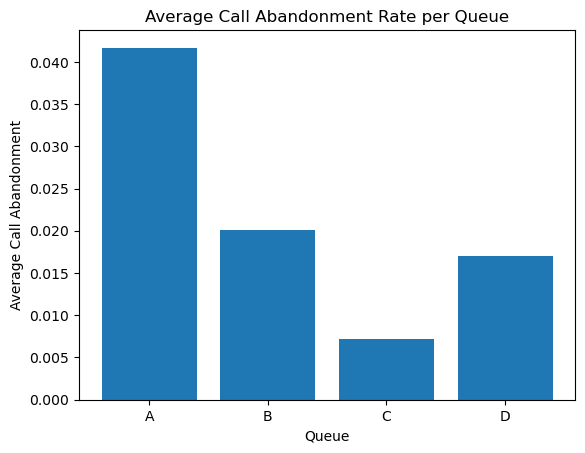

In [31]:
# Create visualization 1 here
# Import any additional libraries needed with alias
import matplotlib.pyplot as plt
import seaborn as sb

# The dictionary abandonment_rates has the data you need.
abandonmentRates = {}
queues = ["A", "B", "C", "D"]
queueDict = DF.groupby("Queue").agg("sum")
for i in range(4):
    abandonmentRates[queues[i]] = queueDict["Abandoned"][i] / queueDict["Calls"][i]
    
#Your Code Here:
plt.bar(range(len(abandonmentRates)), list(abandonmentRates.values()), align='center')
plt.xticks(range(len(abandonmentRates)), list(abandonmentRates.keys()))
plt.title("Average Call Abandonment Rate per Queue")
plt.xlabel("Queue")
plt.ylabel("Average Call Abandonment")
plt.show()

#### Visualization 2: What is the service level percentage and average speed of answer for each rep in the North Branch?
##### Record your answer by double clicking here:

> Chart style you chose and why: I chose a double bar chart for this one in order to show both stats on one chart to make comparing them to each other easier.

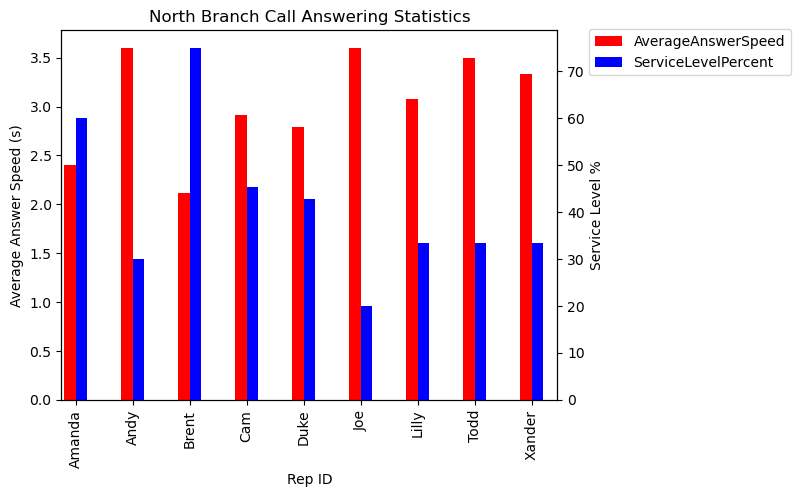

In [183]:
# Create visualization 2 here
# northPlt contains the data you need for the average speed of answer of each rep
northPlt = northDF.groupby("Rep ID")["Incoming Wait Time"].mean().to_frame().reset_index()

# Finding each Rep's Personal Service Level Percentage.  Basically, Calls within 2 secs / total calls
# Table 1: Total Incoming calls less than 2 seconds grouped by Rep
quickCalls = northDF[northDF["Incoming Wait Time"] <= 2.0]
quickReps = quickCalls[["Rep ID", "Calls"]]
quickStats = quickReps.groupby(["Rep ID"]).sum()  # Final Table

# Table 2: Total Incoming Calls Only grouped by Rep
totalCallsIn = northDF[northDF["Incoming or Outgoing"] == "Incoming"]
repCalls = totalCallsIn[["Rep ID", "Calls"]]
totalStats = repCalls.groupby(["Rep ID"]).sum() # Final Table

#  Table 3: Service Level Percentage created via merge
serviceLevel = pd.merge(quickStats, totalStats, on="Rep ID")

# Create Percentage Column in Table 3
serviceLevel["ServiceLevelPercent"] = serviceLevel["Calls_x"]/serviceLevel["Calls_y"] * 100
serviceLevel

#Your Code Here:
# Finding average speed of answer per rep.
repAnsTime = northDFOutDrop[northDFOutDrop["Incoming Wait Time"] > 0]
northRepsAnsTime = repAnsTime[["Rep ID","Incoming Wait Time"]]
northStats = northRepsAnsTime.groupby(["Rep ID"]).sum()
avgAnsSpeed = pd.merge(totalStats,northStats,on="Rep ID")
avgAnsSpeed["AverageAnswerSpeed"] = avgAnsSpeed["Incoming Wait Time"]/avgAnsSpeed["Calls"] # Final table

# Combining Table 3 with Average Answer Table
finalTable = pd.merge(avgAnsSpeed["AverageAnswerSpeed"].round(decimals=2),serviceLevel["ServiceLevelPercent"].round(decimals=2),how="inner",left_on="Rep ID",right_on="Rep ID")
finalTable

# Plotting something nefarious.
fig = plt.figure() # Create matplotlib figure

ax = fig.add_subplot(111) # Create matplotlib axes
ax2 = ax.twinx() # Create another axes that shares the same x-axis as ax.

width = 0.2

finalTable.AverageAnswerSpeed.plot(kind='bar', color='red', ax=ax, width=width, position=1)
finalTable.ServiceLevelPercent.plot(kind='bar', color='blue', ax=ax2, width=width, position=0)

plt.title("North Branch Call Answering Statistics")
ax.set_ylabel("Average Answer Speed (s)")
ax2.set_ylabel("Service Level %")
ax.legend("Average Answer Speed")

h1, l1 = ax.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()
ax.legend(h1+h2, l1+l2, loc='center left', bbox_to_anchor=(1.05, 0.94))

plt.show()

#### Visualization 3: For each type of call purpose, how many calls are outgoing vs. incoming?
##### Record your answer by double clicking here:

> Chart style you chose and why: Again, a bar chart for easy of comparisons between each category.

Call Purpose     Incoming or Outgoing
Complaint        Incoming                 51
Product Support  Outgoing                228
                 Incoming                 82
Sales Support    Outgoing                123
                 Incoming                 75
Name: Incoming or Outgoing, dtype: int64


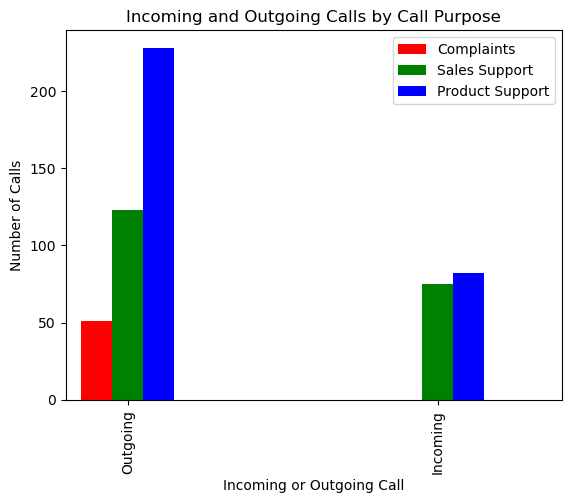

In [156]:
# Create visualization 3 here:
# The three dictionaries, complaints, salesSupport, and productSupport, have the information you need

purposeGroup = DF.groupby("Call Purpose")
callPurpose = ["Complaint", "Product Support", "Sales Support"]
purposeCounts = purposeGroup["Incoming or Outgoing"].value_counts()
print(purposeCounts)

complaints = purposeCounts["Complaint"].to_dict()
salesSupport = purposeCounts["Sales Support"].to_dict()
productSupport = purposeCounts["Product Support"].to_dict()

#Your Code Here:
fig = plt.figure() # Create matplotlib figure

ax = fig.add_subplot(111) # Create matplotlib axes

width = 0.1

purposeCounts["Complaint"].plot(kind='bar', color='red', ax=ax, width=width, position=1.5)
purposeCounts["Sales Support"].plot(kind="bar",color="green",ax=ax,width=width,position=0.5)
purposeCounts["Product Support"].plot(kind='bar', color='blue', ax=ax, width=width, position=-0.5)

plt.title("Incoming and Outgoing Calls by Call Purpose")
ax.set_ylabel("Number of Calls")
ax.set_xlabel("Type of Call")
ax.legend(["Complaints","Sales Support","Product Support"])

plt.show()

<span style="background-color:orangered; color:orangered;">- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -</span>

## Summarize Your Work

With what you know now about the two call centers and the entire company, answer the following questions. Note that while this is subjective, you should include relevant data to back up your opinion.


#### Summary Question 1:  Using KPIs such as average abandonment rate, service level and average speed of answer, in your opinion, which one of the two branches is operating more efficiently? Why?

##### Record your answer by double clicking here:
> Your Answer: South branch is operating more efficiently. It has a lower call abandonment rate (1.27% vs 2.86%), a higher service level (58% vs 40%), and a slightly better average incoming call answer speed (3.0s vs 3.05s).


#### Summary Question 2: Based on the number of reps in each branch and how quickly the reps are working, in your opinion, which branch would benefit from the extra help?

##### Record your answer by double clicking here:
> Your Answer: The reps at each branch appear to work at comparable speeds when comparing their busy minutes, not ready minutes, incoming wait time, and during call wait time. The south branch receives more calls on average and also has two more people than the north branch. Taking this into account alongside the information in queation 1, I believe the north branch would likely benefit more from the extra help.

#### Summary Question 3: Now that you have explored the datasets, is there any data or information that you wish you had in this analysis?

##### Record your answer by double clicking here:
> Your Answer: Minutes spent on each call as well as a difficulty rating for each call could be helpful in understanding why north branch is underperforming. Exeperience level or the amount of years employed for each employee might also help, though wouldn't fit as well with this particular database.


<span style="background-color:orangered; color:orangered;">- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -</span>

## Bonus Mission
Create a visualization that answers this question: For each call purpose, how many calls (incoming and outgoing) take place in each time block?
##### Record your answer by double clicking here:

> Chart style you chose and why: 

In [ ]:
# Create your Bonus Mission visualization here!
call_times = df[["Time Block", "Call Purpose", "Incoming or Outgoing", "Calls"]]

# Use groupby to plot based on time blocks:

# Use groupby and get_group to select which call purpose to plot: